val bovw

In [23]:
import cv2
import numpy as np
import os
import pylab as pl
from sklearn.metrics import confusion_matrix, accuracy_score 
import joblib

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load the classifier, class names, scaler, number of clusters and vocabulary 
#from stored pickle file (generated during training)
clf, classes_names, stdSlr, k, voc = joblib.load('/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Models/bovw_brisk.pkl'  )

# Get the path of the testing image(s) and store them in a list
test_path = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val'  

testing_names = os.listdir(test_path)

NameError: name 'features' is not defined

In [5]:
# Get path to all images and save them in a list
# image_paths and the corresponding label in image_paths
image_paths = []
image_classes = []
class_id = 0

#To make it easy to list all file names in a directory let us define a function
#
def imglist(path):
    return [os.path.join(path, f) for f in os.listdir(path)]


In [7]:
for testing_name in testing_names:
    if not testing_name.endswith('.csv'):
        dir = os.path.join(test_path, testing_name)
        class_path = imglist(dir)
        image_paths+=class_path
        image_classes+=[class_id]*len(class_path)
        class_id+=1
        
# Create feature extraction and keypoint detector objects
    #SIFT is not available anymore in openCV    
# Create List where all the descriptors will be stored

In [49]:
print(len(image_classes))

1998


In [9]:
des_list = []

#BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example
brisk = cv2.BRISK_create(30)


In [10]:
for image_path in image_paths:
    im = cv2.imread(image_path)
    kpts, des = brisk.detectAndCompute(im, None)
    des_list.append((image_path, des))

In [11]:
# Extract descriptors from des_list
descriptor_list = [descriptor for _, descriptor in des_list]

# Stack all the descriptors vertically in a numpy array
descriptors = np.concatenate(descriptor_list, axis=0)

print("Descriptors stacked successfully!")

Descriptors stacked successfully!


In [41]:
type(des_list[1254])

tuple

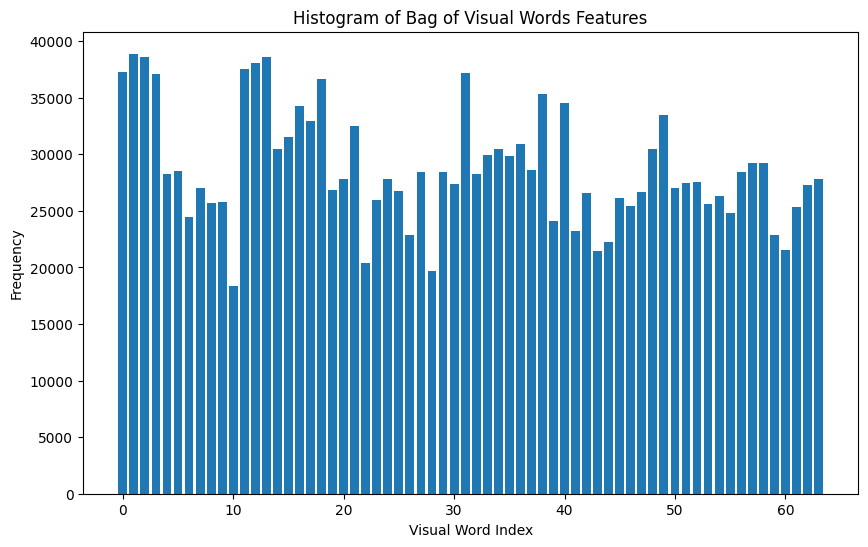

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out any empty descriptors
descriptors_filtered = [descriptor for descriptor in des_list[0][1] if len(descriptor) > 0]

# Assuming all descriptors have the same length or shape
# Convert the descriptors list into a numpy array
features_array = np.array(descriptors_filtered)

# Calculate the histogram of features
histogram = np.sum(features_array, axis=0)

# Display the histogram
plt.figure(figsize=(10, 6))
plt.bar(range(len(histogram)), histogram)
plt.xlabel('Visual Word Index')
plt.ylabel('Frequency')
plt.title('Histogram of Bag of Visual Words Features (Cat Image)')
plt.show()


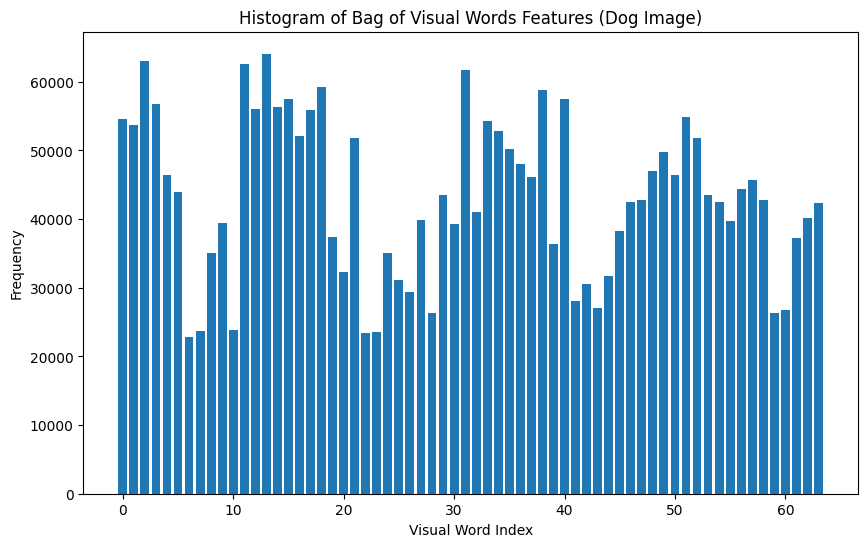

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out any empty descriptors
descriptors_filtered = [descriptor for descriptor in des_list[1597][1] if len(descriptor) > 0]

# Assuming all descriptors have the same length or shape
# Convert the descriptors list into a numpy array
features_array = np.array(descriptors_filtered)

# Calculate the histogram of features
histogram = np.sum(features_array, axis=0)

# Display the histogram
plt.figure(figsize=(10, 6))
plt.bar(range(len(histogram)), histogram)
plt.xlabel('Visual Word Index')
plt.ylabel('Frequency')
plt.title('Histogram of Bag of Visual Words Features (Dog Image)')
plt.show()


In [13]:
# Calculate the histogram of features
#vq Assigns codes from a code book to observations.
from scipy.cluster.vq import vq    
test_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        test_features[i][w] += 1

In [14]:
# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (test_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

In [15]:
# Scale the features
#Standardize features by removing the mean and scaling to unit variance
#Scaler (stdSlr comes from the pickled file we imported)
test_features = stdSlr.transform(test_features)


In [16]:
# Check lengths of both lists
print(len(classes_names))
print(len(image_classes))

image_classes[100]

2
1998


0

In [17]:
print(classes_names)

['Cat', 'Dog']


In [18]:
#Report true class names so they can be compared with predicted classes
true_class =  [classes_names[i] for i in image_classes]
# Perform the predictions and report predicted class names. 
predictions =  [classes_names[i] for i in clf.predict(test_features)]


#Print the true class and Predictions 
print ("true_class ="  + str(true_class))
print ("prediction ="  + str(predictions))


true_class =['Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 

accuracy =  0.6951951951951952
[[782 218]
 [391 607]]


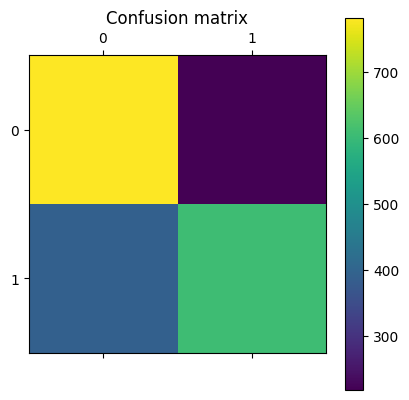

'\n#For classification of unknown files we can print the predictions\n#Print the Predictions \nprint ("Image =", image_paths)\nprint ("prediction ="  + str(predictions))\n\n#np.transpose to save data into columns, otherwise saving as rows\n\nnp.savetxt (\'mydata.csv\', np.transpose([image_paths, predictions]),fmt=\'%s\', delimiter=\',\', newline=\'\n\')\n'

In [19]:
def showconfusionmatrix(cm):
    pl.matshow(cm)
    pl.title('Confusion matrix')
    pl.colorbar()
    pl.show()


accuracy = accuracy_score(true_class, predictions)
print ("accuracy = ", accuracy)
cm = confusion_matrix(true_class, predictions)
print (cm)

showconfusionmatrix(cm)

"""
#For classification of unknown files we can print the predictions
#Print the Predictions 
print ("Image =", image_paths)
print ("prediction ="  + str(predictions))

#np.transpose to save data into columns, otherwise saving as rows

np.savetxt ('mydata.csv', np.transpose([image_paths, predictions]),fmt='%s', delimiter=',', newline='\n')
"""

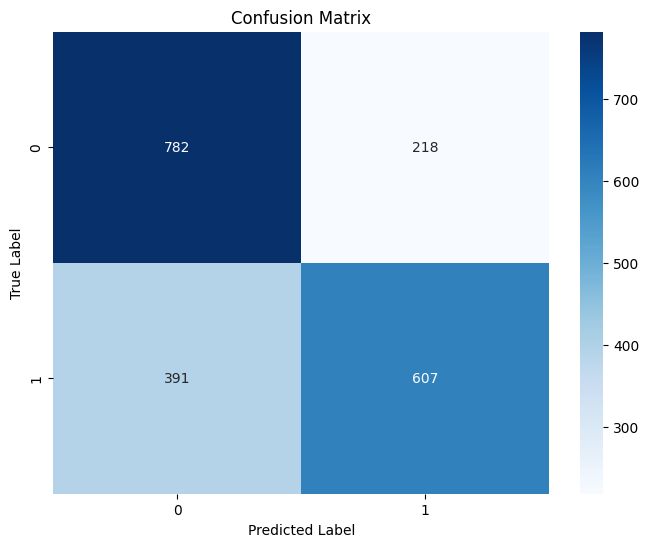

In [24]:
# Create a heatmap with numbers in each cell
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Class 0 - Correctly classified:


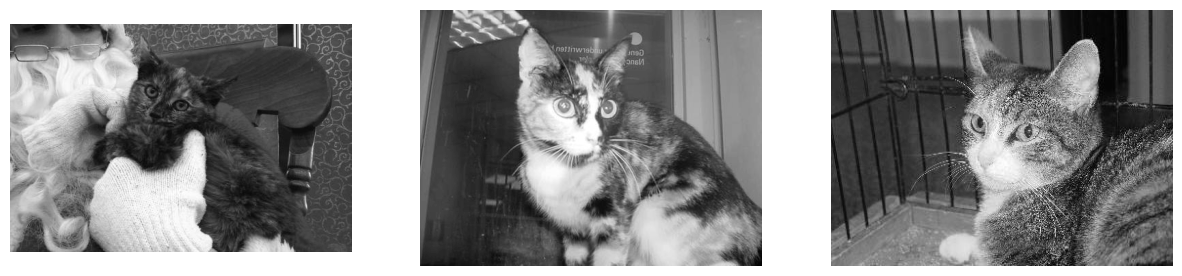

Class 0 - Incorrectly classified:


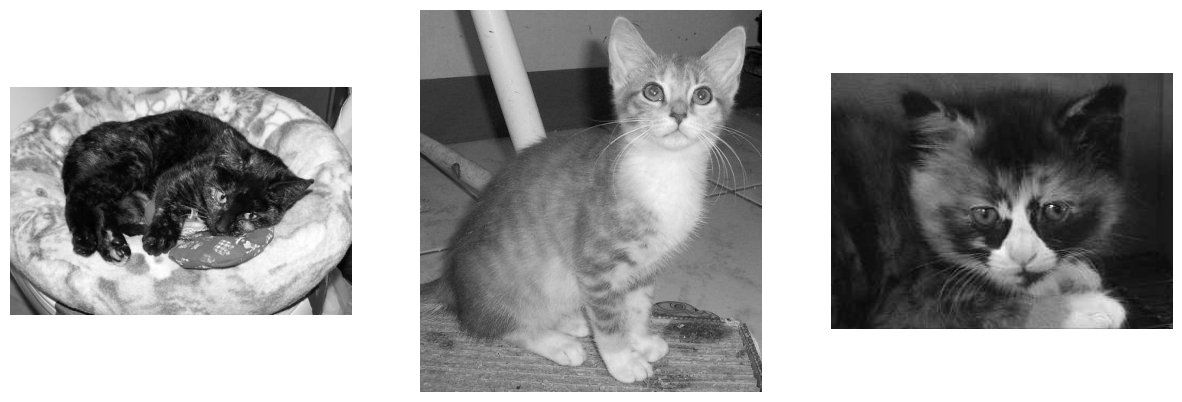

Class 1 - Correctly classified:


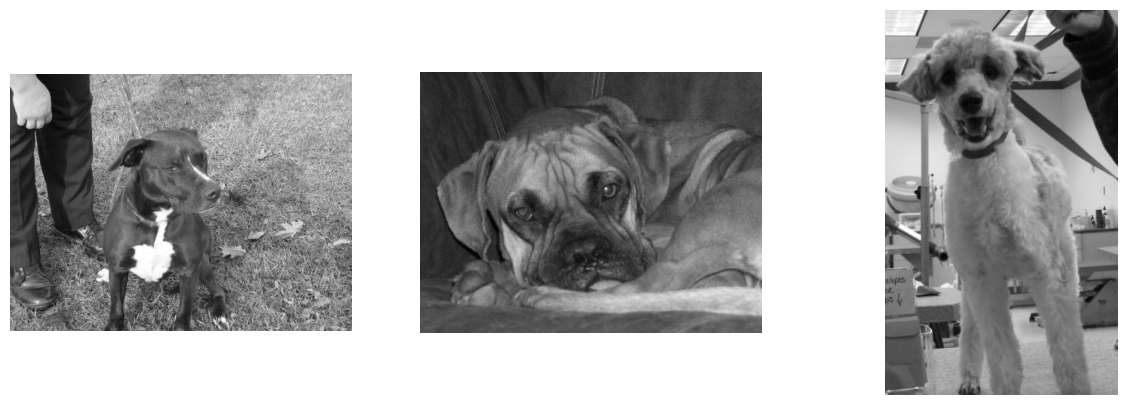

Class 1 - Incorrectly classified:


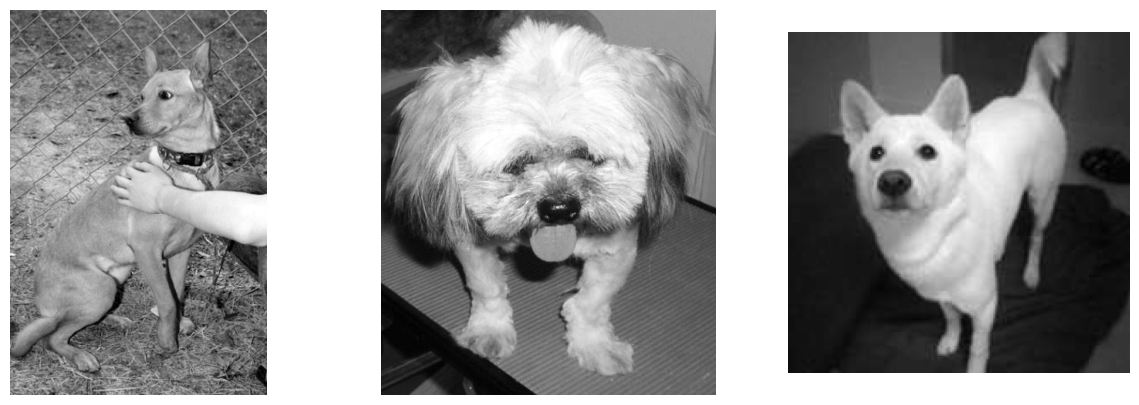

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

# Assuming true_class and predictions are defined earlier in your code
# Assuming image_paths contains the paths to the images

# Create a dictionary to store the indices of correct and incorrect classifications for each class
correct_indices = {0: [], 1: []}
incorrect_indices = {0: [], 1: []}

# Define a mapping from actual labels to numeric labels
label_mapping = {'Cat': 0, 'Dog': 1}

# Populate the correct and incorrect indices lists
for i in range(len(true_class)):
    true_label = label_mapping[true_class[i]]  # Map actual label to numeric label
    pred_label = label_mapping[predictions[i]]  # Map predicted label to numeric label
    if true_label == pred_label:
        correct_indices[true_label].append(i)
    else:
        incorrect_indices[true_label].append(i)

# Function to display images
def display_images_horizontally_bw(image_paths, indices, num_samples=3):
    fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))  # Adjust figsize as needed
    selected_indices = np.random.choice(indices, num_samples, replace=False)
    for i, idx in enumerate(selected_indices):
        image_path = image_paths[idx]
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        axs[i].imshow(image, cmap='gray')  # Display in grayscale
        axs[i].axis('off')
    plt.show()

    
# Display successful and failed classifications for each class
for class_label in [0, 1]:
    print(f"Class {class_label} - Correctly classified:")
    display_images_horizontally_bw(image_paths, correct_indices[class_label])
    print(f"Class {class_label} - Incorrectly classified:")
    display_images_horizontally_bw(image_paths, incorrect_indices[class_label])
